## Observations and Insights

## Dependencies and starter code

In [98]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)


In [99]:
#view the data for mouse_metadata
mouse_metadata


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [100]:
#view the data for study_results
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [101]:
# Combine the data into a single dataset on Mouse ID
merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [102]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# calculating the mean
means = merged_data.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']

# calculating the median
median = merged_data.groupby('Drug Regimen').median()['Tumor Volume (mm3)']

# calculating the variance
variance = merged_data.groupby('Drug Regimen').var()['Tumor Volume (mm3)']

# calculating the standard diviation
standard_diviation = merged_data.groupby('Drug Regimen').std()['Tumor Volume (mm3)']

# calculating the standard error
standard_error = merged_data.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

# creating the new data frame
stats_table = pd.DataFrame({"Mean Tumor Volume": means,
                                           "Median Tumor Volume": median,
                                           "Tumor Volume Variance": variance,
                                           "Tumor Standard Diviation": standard_diviation,
                                           "Tumor Volume std. err.": standard_error})

# formatting
stats_table = stats_table[["Mean Tumor Volume", "Median Tumor Volume", "Tumor Volume Variance", "Tumor Standard Diviation", "Tumor Volume std. err."]]
stats_table.head()

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Standard Diviation,Tumor Volume std. err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar plots

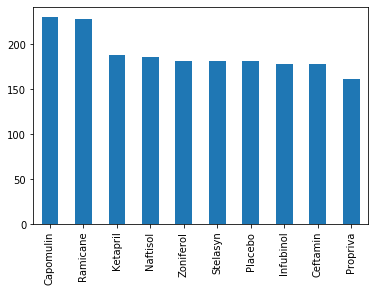

In [103]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
count_py = merged_data["Drug Regimen"].value_counts()
count_py.plot(kind = 'bar')
plt.show()


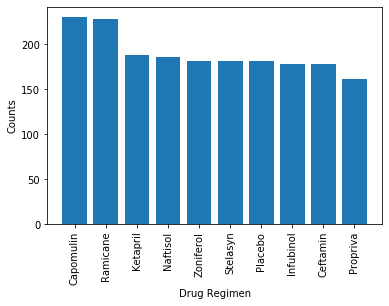

In [104]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
counts = merged_data["Drug Regimen"].value_counts()
plt.bar(counts.index.values, counts.values)
plt.xlabel('Drug Regimen')
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.show()


## Pie plots

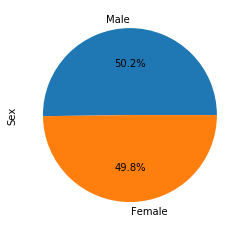

In [105]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
count_m_f = mouse_metadata.Sex.value_counts() 

#generate the pie chart with pandas
count_m_f.plot(kind='pie', autopct='%1.1f%%')

Text(0, 0.5, 'sex')

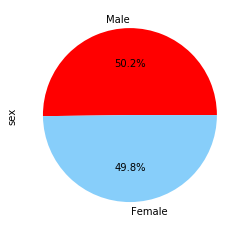

In [106]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Labels for the sections of our pie chart
labels = ["Male", "Female"]

# The values of each section of the pie chart
sizes = ["Male", "Female"]

# The colors of each section of the pie chart
colors = ["red", "lightskyblue"]

#generate the pie plot using pyplot
plt.pie(count_m_f.values, labels=labels, colors=colors, autopct='%1.1f%%')

plt.ylabel('sex')

## Quartiles, outliers and boxplots

In [107]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
#Calculate the IQR and quantitatively determine if there are any potential outliers. 

#getting data for last time point
max_time_loc = merged_data.loc[merged_data["Timepoint"] == 45]

#avg tumor vol at last time point
drug_reg_time_grp = max_time_loc.groupby("Drug Regimen").mean().sort_values(by = "Tumor Volume (mm3)")

#print the df showing smallest avg tumor vol at last time point to find the most successfull Drug Regimens
drug_reg_time_grp.head(4)

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,
Ramicane,10.050000,19.300000,45.0,34.955595,1.250000
Capomulin,12.809524,19.857143,45.0,36.236114,1.476190
Ceftamin,13.538462,27.615385,45.0,64.132421,2.692308
Infubinol,18.555556,26.666667,45.0,65.755562,2.111111


In [108]:
#top 4 Drug Regimens from the df drug_reg_time_grp
Ramicane_loc = merged_data.loc[merged_data["Drug Regimen"] == "Ramicane"]
Capomulin_loc = merged_data.loc[merged_data["Drug Regimen"] == "Capomulin"]
Ceftamin_loc = merged_data.loc[merged_data["Drug Regimen"] == "Ceftamin"]
Infubinol_loc = merged_data.loc[merged_data["Drug Regimen"] == "Infubinol"]

In [109]:
#IQR for Ramicane
quartiles = Ramicane_loc["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Values below 24.18658646249998 could be outliers.
Values above 57.48804812250001 could be outliers.


In [110]:
#IQR for Capomulin
quartiles = Capomulin_loc["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Values below 26.714832162499995 could be outliers.
Values above 55.9711007025 could be outliers.


In [111]:
#IQR for Ceftamin
quartiles = Ceftamin_loc["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Values below 32.818911426250004 could be outliers.
Values above 71.19095325625 could be outliers.


In [112]:
#IQR for Infubinol
quartiles = Infubinol_loc["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Values below 32.309217298749985 could be outliers.
Values above 72.31757996875001 could be outliers.


Text(0, 0.5, 'Final Tumor Volume (mm3)')

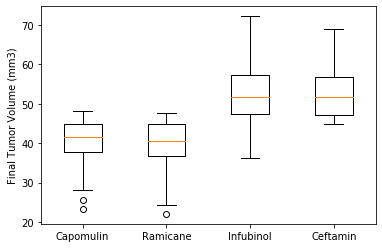

In [113]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot([Capomulin_loc["Tumor Volume (mm3)"], Ramicane_loc["Tumor Volume (mm3)"], Infubinol_loc["Tumor Volume (mm3)"], Ceftamin_loc["Tumor Volume (mm3)"]], labels = [ "Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.ylabel("Final Tumor Volume (mm3)")

## Line and scatter plots

In [114]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# veiw the Capomulin loc df
Capomulin_loc.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


Text(0, 0.5, 'Tumor Volume (mm3)')

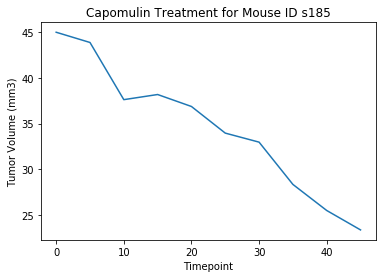

In [115]:
#loc on mouse ID s185 for Capomulin
Mouse_id_s185 = Capomulin_loc.loc[Capomulin_loc["Mouse ID"] == "s185"]

#create the line plot of time vs. tumor vol for mouse ID s185 for Capomulin
plt.plot(Mouse_id_s185["Timepoint"], Mouse_id_s185["Tumor Volume (mm3)"])
plt.title("Capomulin Treatment for Mouse ID s185")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

Text(0, 0.5, 'Average Tumor Volume (mm3)')

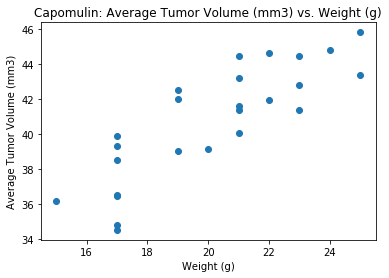

In [116]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# find the avg mouse weight
mouse_weight_avg = Capomulin_loc.groupby("Mouse ID").mean()["Weight (g)"]

# find the avg mouse Tumor Volume (mm3)
mouse_tumor_vol_avg = Capomulin_loc.groupby("Mouse ID").mean()["Tumor Volume (mm3)"]

#create the scatter plot
plt.scatter(mouse_weight_avg, mouse_tumor_vol_avg)
plt.title("Capomulin: Average Tumor Volume (mm3) vs. Weight (g)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")


In [117]:
# Calculate the correlation coefficient and linear regression model for mouse weight and 
# average tumor volume for the Capomulin regimen

# finding the correlation coefficient
correlation = st.pearsonr(mouse_weight_avg,mouse_tumor_vol_avg)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


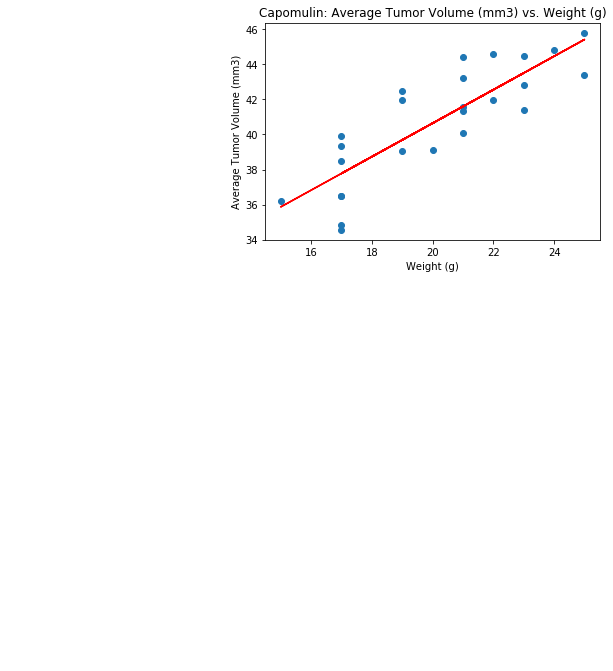

In [118]:
# linear regression model for mouse weight and average tumor volume for the Capomulin regimen

(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weight_avg, mouse_tumor_vol_avg)
regress_values = mouse_weight_avg * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(mouse_weight_avg,mouse_tumor_vol_avg)
plt.plot(mouse_weight_avg,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Capomulin: Average Tumor Volume (mm3) vs. Weight (g)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()